In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ==========================================
# 1. LOAD DATA (200,000 ROWS)
# ==========================================
print("Loading 200,000 rows...")
# Mentor Requirement: Increase nrows to 200000
df = pd.read_csv('US_Accidents_March23.csv', nrows=200000)
print(f"Data Loaded! Shape: {df.shape}")

# ==========================================
# 2. DATA CLEANING & PREPROCESSING (Week 2 Logic)
# ==========================================
print("Cleaning data...")

# Drop empty columns
cols_to_drop = ['End_Lat', 'End_Lng']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Fill missing Precipitation with 0
if 'Precipitation(in)' in df_clean.columns:
    df_clean['Precipitation(in)'] = df_clean['Precipitation(in)'].fillna(0)

# Drop rows with missing critical info
df_clean = df_clean.dropna(subset=['Street', 'City', 'Zipcode'])

# Convert Dates
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'], errors='coerce')
df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], errors='coerce')

# Feature Engineering
df_clean['Hour'] = df_clean['Start_Time'].dt.hour
df_clean['Month'] = df_clean['Start_Time'].dt.month
df_clean['Weekday'] = df_clean['Start_Time'].dt.day_name()
df_clean['Year'] = df_clean['Start_Time'].dt.year

# Deduplicate
df_clean = df_clean.drop_duplicates()

print(f"Cleaned Dataset Shape: {df_clean.shape}")

Loading 200,000 rows...
Data Loaded! Shape: (200000, 46)
Cleaning data...
Cleaned Dataset Shape: (199956, 48)


Running Univariate Analysis...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14152\283084041.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df_clean, palette='viridis')


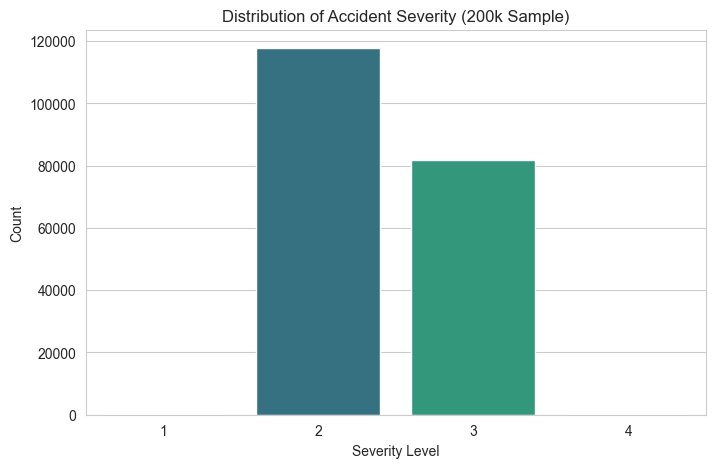

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14152\283084041.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df_clean, palette='coolwarm')


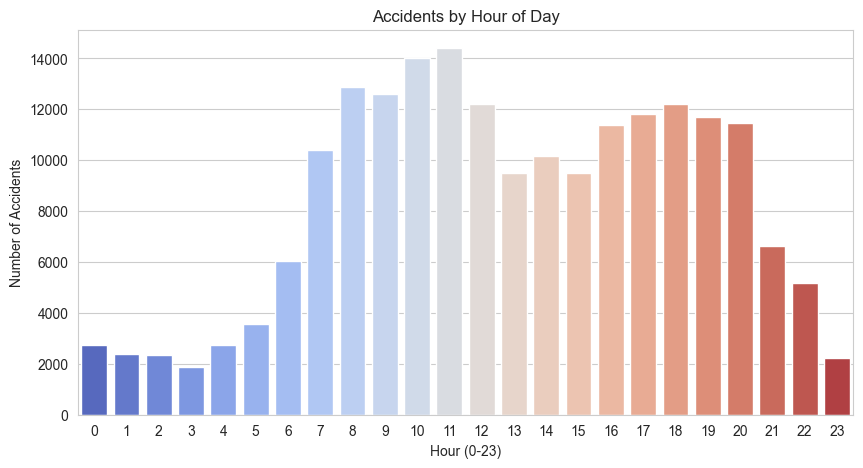

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14152\283084041.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df_clean, palette='magma')


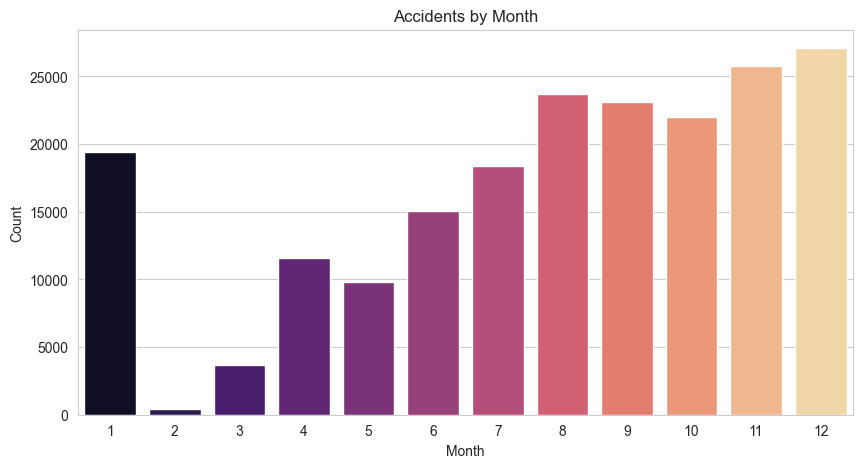

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14152\283084041.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette='Blues_r')


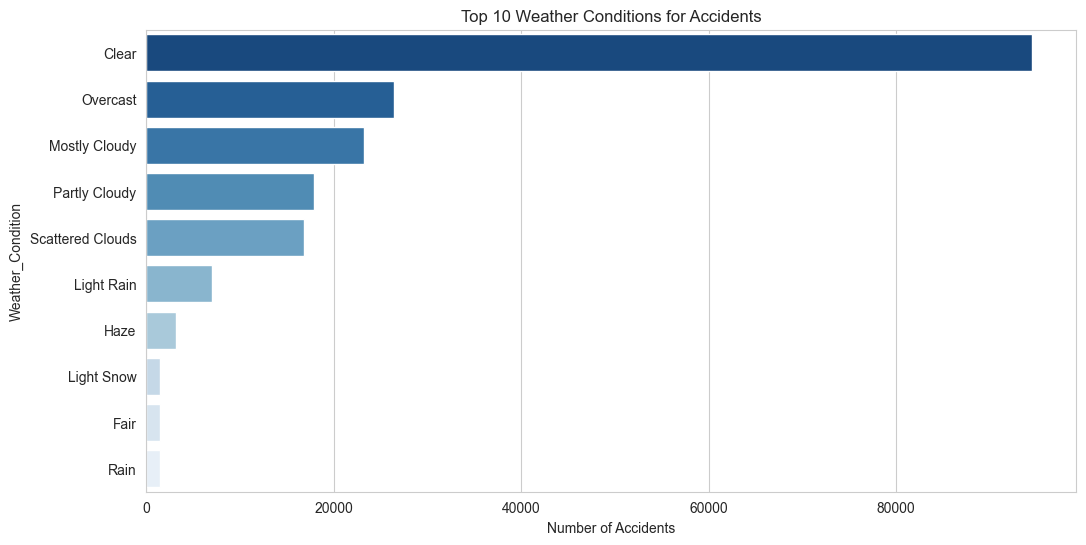

In [2]:
# ==========================================
# WEEK 3: UNIVARIATE ANALYSIS
# ==========================================
print("Running Univariate Analysis...")

# 1. Distribution of Accident Severity
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df_clean, palette='viridis')
plt.title('Distribution of Accident Severity (200k Sample)')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

# 2. Accidents by Hour of Day
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df_clean, palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Accidents')
plt.show()

# 3. Accidents by Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df_clean, palette='magma')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# 4. Top 10 Weather Conditions
plt.figure(figsize=(12, 6))
top_weather = df_clean['Weather_Condition'].value_counts().head(10)
sns.barplot(x=top_weather.values, y=top_weather.index, palette='Blues_r')
plt.title('Top 10 Weather Conditions for Accidents')
plt.xlabel('Number of Accidents')
plt.show()

Running Bivariate Analysis...


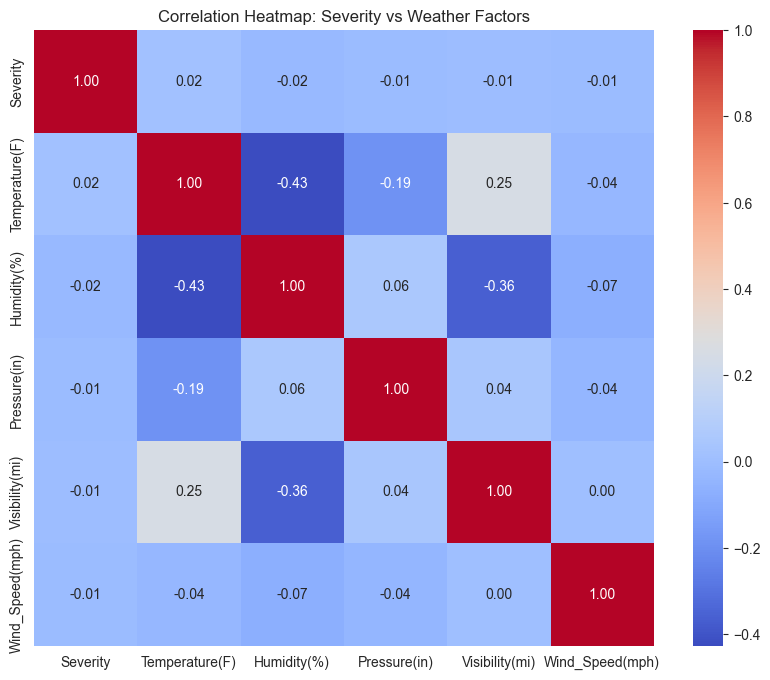

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14152\1734907560.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Visibility(mi)', data=df_clean, palette='Set2')


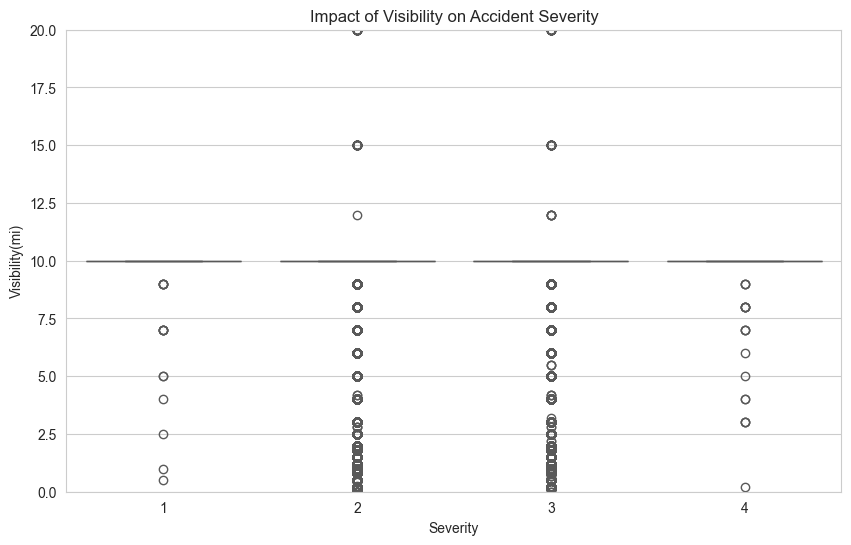

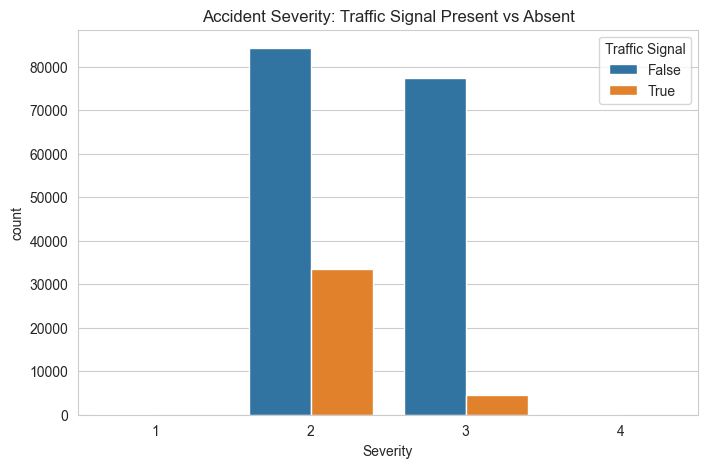

In [3]:
# ==========================================
# WEEK 4: BIVARIATE ANALYSIS
# ==========================================
print("Running Bivariate Analysis...")

# 1. Correlation Heatmap (Numeric Columns Only)
# We select specific columns relevant to weather and severity
numeric_cols = ['Severity', 'Temperature(F)', 'Humidity(%)', 
                'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
plt.figure(figsize=(10, 8))
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Severity vs Weather Factors')
plt.show()

# 2. Impact of Visibility on Severity (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df_clean, palette='Set2')
plt.title('Impact of Visibility on Accident Severity')
plt.ylim(0, 20) # Focus on 0-20 miles visibility range
plt.show()

# 3. Severity vs Traffic Signals
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', hue='Traffic_Signal', data=df_clean)
plt.title('Accident Severity: Traffic Signal Present vs Absent')
plt.legend(title='Traffic Signal')
plt.show()